# <span style="color:darkgreen">DATSCIW261 ASSIGNMENT 10</span>
#### MIDS UC Berkeley, Machine Learning at Scale

<b>AUTHORS</b> : Rajesh Thallam <br>
<b>EMAIL</b>  : rajesh.thallam@ischool.berkeley.edu <br>
<b>WEEK</b>   : 11 <br>
<b>DATE</b>   : 17-Nov-15

***

<h2><span style="color:dodgerblue;font:12px">HW10.0</span></h2> 

<span style="color:firebrick; font-size: 120%;"><b>Short answer questions</b></span>

<span style="color:CornflowerBlue ">a. What is Apache Spark and how is it different to Apache Hadoop? </span><br>

Apache Spark is a framework for performing general data processing and analytics on a single node or distributed computing cluster like Hadoop. It provides in-memory computations for increase speed and data process over mapreduce. It can run on top of existing hadoop cluster and access hadoop data store (HDFS), also supports SQL and structured data processing thropugh Spark SQL, MLlib for machine learning, GraphX for graph processing, and Spark Streaming for real time data feeds.

Apache Spark stores data in-memory whereas Hadoop stores data on disk. Hadoop uses replication to achieve fault tolerance whereas Spark uses resilient distributed datasets (RDD) as a data storage model, which has a smart way of guaranteeing fault tolerance that minimizes network I/O.

- Spark execute batch processing jobs, about 10 to 100 times faster than the Hadoop MapReduce framework by making the use of in-memory processing compared to persistence storage used by Hadoop.
- With Spark, we can use the inbuild libraries to perform Batch Processing, Streaming, Machine Learning and Interactive SQL queries in a single cluster unlike Hadoop which only provides Batch Processing at the core.
- Spark is extremely fast by making use of caching and in-memory processing and Hadoop on the other hand is completely disk dependent.
- Spark enables iterative computations in use cases like machine learning when computation need to be performed multiple times on same set of data.

<span style="color:CornflowerBlue">b. Fill in the blanks. Spark API consists of interfaces to develop applications based on it in Java, ...... languages (list languages)</span><br>

Spark API consists of interfaces to develop applications based on it in Java, **Scala, Python and R** languages

<span style="color:CornflowerBlue">c. Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or ????? in a distributed manner.</span>

Using Spark, resource management can be done either in a single server instance or using a framework such as Mesos or **YARN** in a distributed manner.

<span style="color:CornflowerBlue">d. What is an RDD and show a fun example of creating one and bringing the first element back to the driver program. </span><br>

RDD (Resilient Distributed Datasets) is the data storage model used in Apache Spark framework. It's immutable (read-only) and partitioned collection of records that can be stored in the volatile memory or in a persistent storage. RDDs are fault-tolerant, parallel data structures that let users explicitly persist intermediate results in memory, control their partitioning to optimize data placement, and manipulate them using a rich set of operators.

Below is example of creating RDD by ingesting a text file and returning first line in the file

In [3]:
rdd = sc.textFile("./data.csv")
rdd.first() 

u'7.036908147002323588e+00,5.889744357163136712e+00'

<span style="color:CornflowerBlue">e. What is lazy evaluation and give an intuitive example of lazy evaluation and comment on the massive computational savings to be had from lazy evaluation. </span><br>

**Lazy evaluation** is a functional programming method to evaluate a program. It means that expressions are not evaluated when they are bound to variables, but their evaluation is deferred until their results are needed by other computations. In consequence, arguments are not evaluated before they are passed to a function, but only when their values are actually used.

With lazy evaluation there is performance benefit by avoiding needless calculations, and error conditions in evaluating compound expressions.

***

<span style="color:firebrick; font-size: 120%;"><b>PySpark Configuration Test</b></span><br>

In [1]:
import os
import sys #current as of 9/26/2015
spark_home = os.environ['SPARK_HOME'] = '/usr/local/spark'

if not spark_home:
    raise ValueError('SPARK_HOME enviroment variable is not set')
sys.path.insert(0,os.path.join(spark_home,'python'))
sys.path.insert(0,os.path.join(spark_home,'python/lib/py4j-0.8.2.1-src.zip'))
execfile(os.path.join(spark_home,'python/pyspark/shell.py'))

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 1.5.2
      /_/

Using Python version 2.7.6 (default, Jun 22 2015 17:58:13)
SparkContext available as sc, HiveContext available as sqlContext.


***

<h2><span style="color:dodgerblue;font:12px">HW10.1</span></h2> 

<span style="color:CornflowerBlue ">In Spark write the code to count how often each word appears in a text document (or set of documents). Please use this homework document as a the example document to run an experiment.  Report the following: provide a sorted list of tokens in decreasing order of frequency of occurence. </span><br>

In [4]:
import re

# ingest text file and tokenize words. For each word emit (word, 1) from the mapper
# calculate word frequency and report top 10 words in decreasing order of frequency

sc.textFile("MIDS-MLS-HW-10.txt")\
  .flatMap(lambda line: re.findall(r'[\w]+', line)) \
  .map(lambda word: (word, 1)) \
  .reduceByKey(lambda a, b: a + b) \
  .takeOrdered(10, key = lambda x: -x[1])

[(u'the', 44),
 (u'and', 23),
 (u'of', 17),
 (u'in', 17),
 (u'10', 15),
 (u'a', 12),
 (u'HW', 11),
 (u'data', 11),
 (u'code', 10),
 (u'to', 9)]

<h2><span style="color:dodgerblue;font:12px">HW10.1.1</span></h2> 

<span style="color:CornflowerBlue ">Modify the above word count code to count words that begin with lower case letters (a-z) and report your findings. Again sort the output words in decreasing order of frequency.</span><br>

In [5]:
import re

# ingest text file and tokenize words starting with lower case words. F
# for each word emit (word, 1) from the mapper
# calculate word frequency and report top 10 words in decreasing order of frequency

sc.textFile("MIDS-MLS-HW-10.txt")\
  .flatMap(lambda line: re.findall(r'\b[a-z]\w+\b', line)) \
  .map(lambda word: (word, 1)) \
  .reduceByKey(lambda a, b: a + b) \
  .takeOrdered(10, key = lambda x: -x[1])

[(u'the', 44),
 (u'and', 23),
 (u'of', 17),
 (u'in', 17),
 (u'data', 11),
 (u'code', 10),
 (u'to', 9),
 (u'clusters', 9),
 (u'for', 7),
 (u'on', 7)]

***

<h2><span style="color:dodgerblue;font:12px">HW10.2</span></h2> 

<span style="color:firebrick; font-size: 120%;"><b>K-Means a la MLLib</b></span>

<span style="color:CornflowerBlue ">Using the following  MLlib-centric KMeans code snippet:</span><br>

In [32]:
from pyspark.mllib.clustering import KMeans, KMeansModel
from numpy import array
from math import sqrt

# Load and parse the data
# NOTE  kmeans_data.txt is available here https://www.dropbox.com/s/q85t0ytb9apggnh/kmeans_data.txt?dl=0 
data = sc.textFile("kmeans_data.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Build the model (cluster the data)
clusters = KMeans.train(parsedData, 2, maxIterations=10,
        runs=10, initializationMode="random")

# Evaluate clustering by computing Within Set Sum of Squared Errors
def error(point):
    center = clusters.centers[clusters.predict(point)]
    return (sum([x**2 for x in (point - center)]))

WSSSE = parsedData.map(lambda point: error(point)).reduce(lambda x, y: x + y)
print("Within Set Sum of Squared Error = " + str(WSSSE))
print "Cluster centroids = {}".format(str(clusters.centers))

# Save and load model
#clusters.save(sc, "myModelPath")
#sameModel = KMeansModel.load(sc, "myModelPath")

Within Set Sum of Squared Error = 0.12
Cluster centroids = [array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])]


<span style="color:CornflowerBlue">Run this code snippet and list the clusters that your find and compute the Within Set Sum of Squared Errors for the found clusters. Comment on your findings.</span><br>

In [33]:
print "Within Set Sum of Squared Error = {}".format(str(WSSSE))

Within Set Sum of Squared Error = 0.12


In [34]:
print "Cluster centroids = {}".format(str(clusters.centers))

Cluster centroids = [array([ 0.1,  0.1,  0.1]), array([ 9.1,  9.1,  9.1])]


In [35]:
clusters.computeCost(parsedData)

0.11999999999994547

**With k = 2 the k-means cluastering explains ~12% of variance between the actual and predicted clusters.**

NOTE: I removed sqrt in the error function as we are supposed to calculate sum of squared errors. This result matches with the built-in function `computeCost` in the MLlib Clustering module.

***

<h2><span style="color:dodgerblue;font:12px">HW10.3</span></h2> 

<span style="color:firebrick; font-size: 120%;"><b>K-Means</b></span>

<span style="color:CornflowerBlue ">Download the following [KMeans notebook](https://www.dropbox.com/s/3nsthvp8g2rrrdh/EM-Kmeans.ipynb?dl=0). Generate 3 clusters with 100 (one hundred) data points per cluster (using the code provided). Plot the data. Then run MLlib's Kmean implementation on this data  and report your results as follows: <br>
<br> - Plot the resulting clusters after 1 iteration, 10 iterations, after 20 iterations, after 100 iterations. <br> - In each plot please report the Within Set Sum of Squared Errors for the found clusters. 
<br><br>Comment on the progress of this measure as the KMeans algorithms runs for more iterations
</span><br>

<span style="color:cornflowerblue; font-size: 120%;"><b>Data Generation</b></span><br>

In [37]:
%matplotlib inline

import numpy as np
import pylab as plt
import json

size1 = size2 = size3 = 100

samples1 = np.random.multivariate_normal([4, 0], [[1, 0],[0, 1]], size1)
data = samples1
samples2 = np.random.multivariate_normal([6, 6], [[1, 0],[0, 1]], size2)
data = np.append(data,samples2, axis=0)
samples3 = np.random.multivariate_normal([0, 4], [[1, 0],[0, 1]], size3)
data = np.append(data,samples3, axis=0)

# Randomlize data
data = data[np.random.permutation(size1+size2+size3),]
np.savetxt('data.csv',data,delimiter = ',')

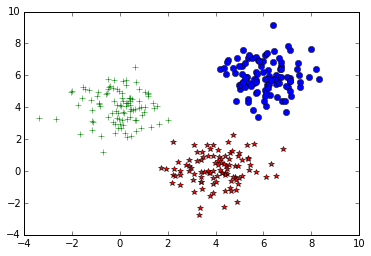

In [11]:
plt.plot(samples1[:, 0], samples1[:, 1],'*', color = 'red')
plt.plot(samples2[:, 0], samples2[:, 1],'o',color = 'blue')
plt.plot(samples3[:, 0], samples3[:, 1],'+',color = 'green')
plt.show()

<span style="color:cornflowerblue; font-size: 120%;"><b>Run K-Means for varying iterations</b></span><br>

In [29]:
def error(clusters, point):
    center = clusters.centers[clusters.predict(point)]
    return (sum([x**2 for x in (point - center)]))

In [38]:
# plot centroids and data points for each iteration
def plot_iteration(k, iteration, means):
    plt.plot(samples1[:, 0], samples1[:, 1], '*', color = 'blue', alpha=0.25)
    plt.plot(samples2[:, 0], samples2[:, 1], '*', color = 'blue', alpha=0.25)
    plt.plot(samples3[:, 0], samples3[:, 1], '*', color = 'blue', alpha=0.25)
    plt.plot(means[0][0], means[0][1], '*', markersize =10, color = 'red')
    plt.plot(means[1][0], means[1][1], '*', markersize =10, color = 'red')
    plt.plot(means[2][0], means[2][1], '*', markersize =10, color = 'red')
    plt.title("Clusters with k = {} and iterations = {}".format(k, iteration))
    plt.show()

Iteration 1
Within Set Sum of Squared Error (WSSSE) = 2265.90621769
Cluster Centers:
[ 4.1538482   5.97160693] [ 2.35801049  1.30380245] [ 6.99088907  5.15567938]


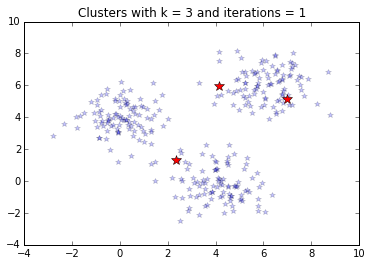

Iteration 2
Within Set Sum of Squared Error (WSSSE) = 612.445229296
Cluster Centers:
[ 4.03720006 -0.18150534] [ 0.0498974   3.98109842] [ 6.12235023  6.03164518]


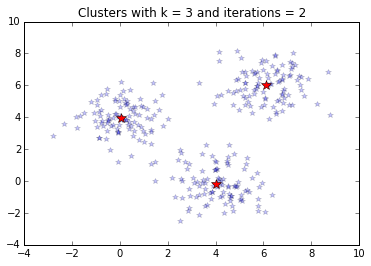

Iteration 3
Within Set Sum of Squared Error (WSSSE) = 612.445229296
Cluster Centers:
[ 6.12235023  6.03164518] [ 0.0498974   3.98109842] [ 4.03720006 -0.18150534]


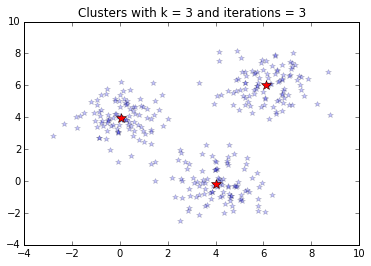

Iteration 5
Within Set Sum of Squared Error (WSSSE) = 612.445229296
Cluster Centers:
[ 4.03720006 -0.18150534] [ 6.12235023  6.03164518] [ 0.0498974   3.98109842]


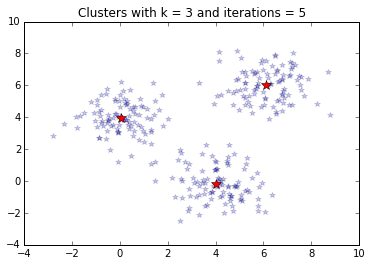

Iteration 10
Within Set Sum of Squared Error (WSSSE) = 2196.90765463
Cluster Centers:
[ 5.85502466  5.25165271] [ 6.42380248  6.91121116] [ 2.06348524  1.87898352]


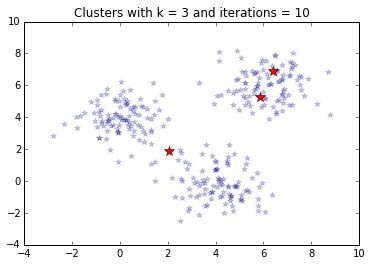

Iteration 20
Within Set Sum of Squared Error (WSSSE) = 612.445229296
Cluster Centers:
[ 4.03720006 -0.18150534] [ 0.0498974   3.98109842] [ 6.12235023  6.03164518]


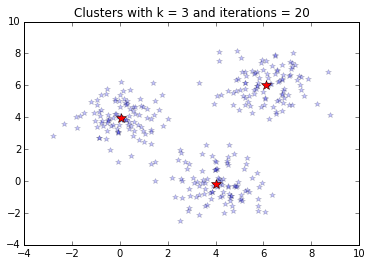

Iteration 100
Within Set Sum of Squared Error (WSSSE) = 612.445229296
Cluster Centers:
[ 0.0498974   3.98109842] [ 4.03720006 -0.18150534] [ 6.12235023  6.03164518]


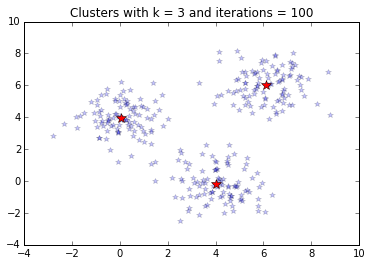

In [39]:
%matplotlib inline

import numpy as np
import pylab as plt

k = 3
iterations = [1, 2, 3, 5, 10, 20, 100]

# create RDD
D = sc.textFile("./data.csv").map(lambda line: array([float(x) for x in line.split(',')])).cache()
clusters = None
wssse = []

for iteration in range(1, 101):
    # Build the model (cluster the data)
    clusters = KMeans.train(D, k, maxIterations=iteration, runs=1, initializationMode = "random")
    WSSSE = clusters.computeCost(D)
    wssse.append(WSSSE)
    
    if iteration in iterations:
        print "="*80
        print 'Iteration {}'.format(iteration)
        print "="*80

        print "Within Set Sum of Squared Error (WSSSE) = {1}".format(iteration, WSSSE)
        print 'Cluster Centers:'.format(iteration)
        print clusters.centers[0], clusters.centers[1], clusters.centers[2]

        # Plot the points & centroids
        plot_iteration(k, iteration, clusters.clusterCenters)

<span style="color:cornflowerblue; font-size: 120%;"><b>Comparing Within Set Sum of Squared Errors</b></span><br>

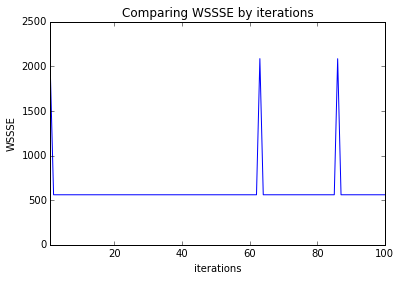

In [15]:
x = range(1, 101)
plt.plot(x, wssse)
plt.title("Comparing WSSSE by iterations")
plt.xlabel("iterations")
plt.ylabel("WSSSE")
plt.ylim(1, 2500)
plt.xlim(1, 100)
plt.show()

I captured WSSSE for every iteration instead of just [1, 10, 20, 100]. Foriterations [1, 10, 20, 100] centroids converged after 10 iterations and thereafter WSSSE remains constant. However, when I plot for all the iterations there are spikes in WSSE sporadically. This can be attributed to random initialization for every iteration instead of feeding new centroids for every iteration.

***

<h2><span style="color:dodgerblue;font:12px">HW10.4</span></h2>

<span style="color:firebrick; font-size: 120%;"><b>K-Means (homegrown code)</b></span>

<span style="color:CornflowerBlue ">Using the KMeans code (homegrown code) provided repeat the experiments in HW10.3. Comment on any differences between the results in HW10.3 and HW10.4. Explain.</span><br>

In [2]:
import numpy as np
import pylab as plt
from numpy import array

%matplotlib inline

In [3]:
#Calculate which class each data point belongs to
def nearest_centroid(line):
    x = np.array([float(f) for f in line.split(',')])
    closest_centroid_idx = np.sum((x - centroids)**2, axis=1).argmin()
    return (closest_centroid_idx,(x,1))

In [22]:
def error(center, point):
    return (np.sum([x**2 for x in (point - center)]))

Iteration 1
Within Set Sum of Squared Error (WSSSE) = 19671.0084646
Cluster Centers:
[ 0.90469152  0.33078864] [ 3.86077493  2.66266436] [ 2.20645063  5.79777905]


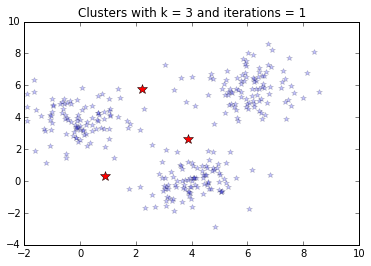

Iteration 2
Within Set Sum of Squared Error (WSSSE) = 18152.6473986
Cluster Centers:
[ 1.59985527  0.91498946] [ 5.25901849  2.46765533] [ 2.50068099  5.34857583]


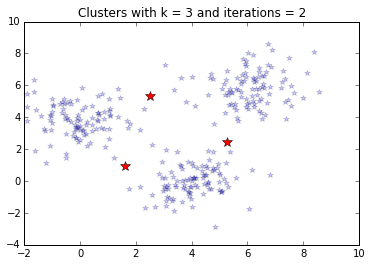

Iteration 3
Within Set Sum of Squared Error (WSSSE) = 18179.069823
Cluster Centers:
[ 1.95153001  0.944854  ] [ 5.6847381   2.89153037] [ 2.52445405  5.35674132]


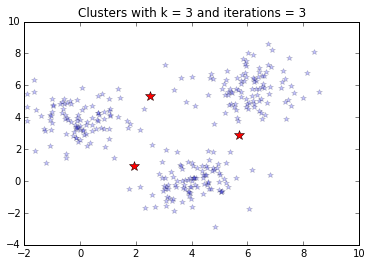

Iteration 5
Within Set Sum of Squared Error (WSSSE) = 23372.6847263
Cluster Centers:
[ 3.68726242  0.10111726] [ 6.17112988  5.73487977] [ 0.12910341  4.08054026]


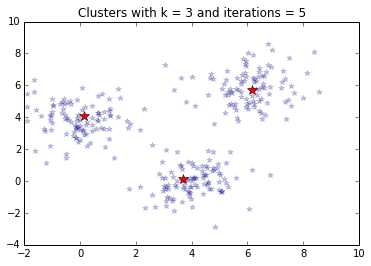

Iteration 10
Within Set Sum of Squared Error (WSSSE) = 23877.8559899
Cluster Centers:
[ 4.04151181 -0.0146528 ] [ 6.06375432  5.84176406] [-0.02512142  3.81757386]


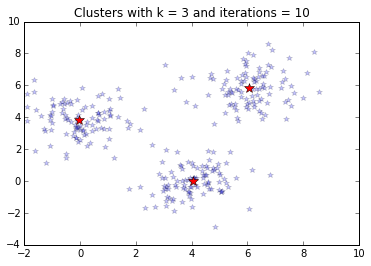

Iteration 20
Within Set Sum of Squared Error (WSSSE) = 23877.8559899
Cluster Centers:
[ 4.04151181 -0.0146528 ] [ 6.06375432  5.84176406] [-0.02512142  3.81757386]


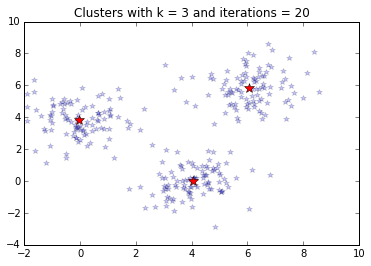

Iteration 100
Within Set Sum of Squared Error (WSSSE) = 23877.8559899
Cluster Centers:
[ 4.04151181 -0.0146528 ] [ 6.06375432  5.84176406] [-0.02512142  3.81757386]


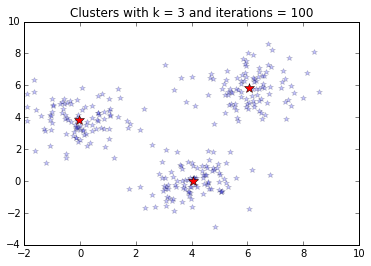

In [24]:
k = 3
iterations = [1, 2, 3, 5, 10, 20, 100]

# Initialization: initialization of parameter is fixed to show an example
centroids = np.array([[0.0,0.0], [2.0,2.0], [0.0,7.0]])

D = sc.textFile("./data.csv").cache()
parsedData = D.map(lambda line: array([float(x) for x in line.split(',')])).cache()
wssse = []

for i in range(1, 101):
    res = D.map(nearest_centroid).reduceByKey(lambda x,y : (x[0]+y[0],x[1]+y[1])).collect()
    #res [(0, (array([  2.66546663e+00,   3.94844436e+03]), 1001)  ), 
    #     (2, (array([ 6023.84995923,  5975.48511018]), 1000)), 
    #     (1, (array([ 3986.85984761,    15.93153464]), 999))]
    # res[1][1][1] returns 1000 here

    res = sorted(res, key = lambda x : x[0])  #sort based on clusted ID
    centroids_new = np.array([x[1][0]/x[1][1] for x in res])  #divide by cluster size
    
    WSSSE = parsedData.map(lambda point:error(centroids_new, point)).reduce(lambda x, y: x + y)
    wssse.append(WSSSE)
        
    #if np.sum(np.absolute(centroids_new-centroids))<0.01:
    #    break

    centroids = centroids_new

    if i in iterations:
        print "="*80
        print "Iteration {}".format(i)
        print "="*80
        
        print "Within Set Sum of Squared Error (WSSSE) = {}".format(WSSSE)
        print 'Cluster Centers:'
        print centroids[0], centroids[1], centroids[2]

        plot_iteration(k, i, centroids)

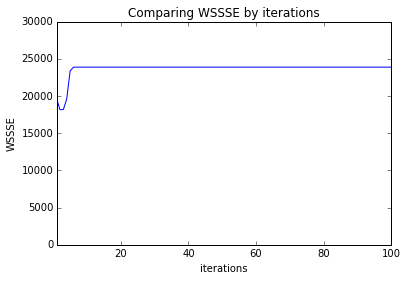

In [28]:
x = range(1, 101)
plt.plot(x, wssse)
plt.title("Comparing WSSSE by iterations")
plt.xlabel("iterations")
plt.ylabel("WSSSE")
plt.ylim(1, 30000)
plt.xlim(1, 100)
plt.show()

Compared to MLLib implementation, homegrown code has larger WSSSE indicating clusters are not compact enough with the homegrown ode. In both the implementations, centroids converge after 5 iterations and WSSSE almost remains constant.

***

<h2><span style="color:dodgerblue;font:12px">HW10.5</span></h2> 

<span style="color:firebrick; font-size: 120%;"><b>Weighted K-Means</b></span>

<span style="color:CornflowerBlue ">Using the KMeans code provided modify it to do a weighted KMeans and repeat the experiements in HW10.3. Comment on any differences between the results in HW10.3 and HW10.5. Explain. <br><br>
NOTE: Weight each example as follows using the inverse vector length (Euclidean norm): <br><br>
weight(X)= 1/||X||, where ||X|| = SQRT(X.X)= SQRT(X1^2 + X2^2)<br>
Here X is vector made up of X1 and X2.</span><br>

***

<h2><span style="color:dodgerblue;font:12px">HW10.6</span></h2> 

<span style="color:firebrick; font-size: 120%;"><b>HW 10.6.1 Linear Regression</b></span>

<span style="color:CornflowerBlue ">Using the following [linear regression notebook](https://www.dropbox.com/s/atzqkc0p1eajuz6/LinearRegression-Notebook-Challenge.ipynb?dl=0), generate 2 sets of data with 100 data points using the data generation code provided and plot each in separate plots. Call one the training set and the other the testing set. <br><br>
Using MLLib's LinearRegressionWithSGD train up a linear regression model with the training dataset and evaluate with the testing set. What a good number of iterations for training the linear regression model? Justify with plots and words. </span><br>

***

<span style="color:firebrick; font-size: 120%;"><b>HW 10.6.2 Gradient Descent</b></span>

<span style="color:CornflowerBlue"> In the notebook provide, in the cell labeled "Gradient descent (regularization)". Fill in the blanks and get this code to work for LASS0 and RIDGE linear regression. Using the data from 10.6.1 tune the hyper parameters of your LASS0 and RIDGE regression. Report your findings with words and plots.</span>

***

<span style="color:firebrick">** -- END OF ASSIGNMENT 10 -- **</span>